In [1]:
# !git clone https://github.com/Sridipta-Roy/GenAI-Labs.git

Cloning into 'GenAI-Labs'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 95 (delta 14), reused 85 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (95/95), 30.96 MiB | 23.66 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
# !pip install tensorflow numpy matplotlib seaborn

# LSTM Assignment (Graded): Sentiment Analysis on IMDB Movie Reviews

Welcome to your programming assignment on LSTM! You will build a Deep Learning Model with LSTMs to to perform sentiment analysis on movie reviews from the IMDB dataset.

## Problem Description

- In this project, you will develop a deep learning model to perform sentiment analysis on movie reviews from the IMDB dataset.

- The goal is to create a model that can accurately classify movie reviews as either positive or negative based on the text content.

## Dataset Description

- The IMDB dataset consists of 50,000 movie reviews, split evenly into 25,000 training and 25,000 testing samples.

- Each review is labeled as either positive (1) or negative (0).

- The dataset has been preprocessed to contain only the most frequent 10,000 words.

- Key features of the dataset:
    - 50,000 movie reviews (25,000 for training, 25,000 for testing)
    - Binary sentiment classification (positive or negative)
    - Preprocessed to include only the top 10,000 most frequent words
    - Variable length reviews

- For more information about the dataset, refer to this link: [IMDB TF Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) || [IMDB Stanford Dataset](https://ai.stanford.edu/%7Eamaas/data/sentiment/)

## Assignment Tasks

1. **Data Preprocessing**
   - Explore the dataset structure and characteristics
   - Pad the sequences to a fixed length for model input

2. **Model Architecture**
   - Design a deep learning model for sentiment classification
   - Include appropriate layers for text processing (e.g., Embedding layer)

3. **Model Training**
   - Split the data into training and validation sets
   - Implement callbacks for early stopping and learning rate reduction
   - Train the model and monitor its performance

4. **Evaluation and Analysis**
   - Evaluate the model on the test set
   - Plot training and validation accuracy/loss curves

5. **Prediction and Interpretation**
   - Use the trained model to make predictions on new, unseen reviews

## Instructions

- Only write code when you see any of the below prompts,

    ```
    # YOUR CODE GOES HERE
    # YOUR CODE ENDS HERE
    # TODO
    ```

- Do not modify any other section of the code unless tated otherwise in the comments.

# Code Section

In [3]:
#Adding for running in Colab
# import os
# os.chdir('/content/GenAI-Labs/Week_5/LSTM')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.methods import load_imdb_data, detect_and_set_device, plot_history
from tests.test_methods import test_pad_sequences_data, test_create_model, test_train_model, test_evaluate_model

# Change back to the original directory if needed, although not strictly necessary for this notebook
# os.chdir('/content')

In [4]:
# Load the data
num_words = 10000
(x_train, y_train), (x_test, y_test) = load_imdb_data(num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data Loaded Successfully


## Task: Let's get to know about our dataset

### Shape of the dataset: Testing and Training

In [5]:
# TODO: Shape of the data

x_train_shape = x_train.shape
x_test_shape = x_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape


print(f"Training Data Shape: {x_train_shape}")
print(f"Training Labels Shape: {y_train_shape}")
print(f"Test Data Shape: {x_test_shape}")
print(f"Test Labels Shape: {y_test_shape}")

Training Data Shape: (25000,)
Training Labels Shape: (25000,)
Test Data Shape: (25000,)
Test Labels Shape: (25000,)


### Class Distribution of the dataset

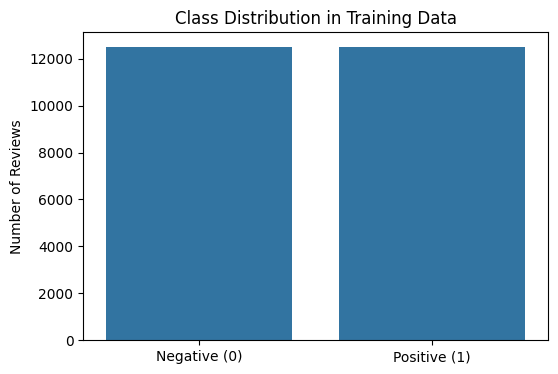

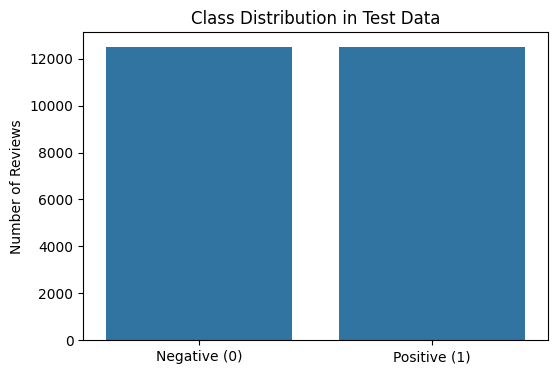

In [6]:
def plot_class_distribution(labels, dataset_type):
    """Plot the distribution of positive and negative reviews."""
    # YOUR CODE GOES HERE
    unique, counts = np.unique(labels, return_counts=True)
    # YOUR CODE ENDS HERE
    plt.figure(figsize=(6, 4))
    sns.barplot(x=unique, y=counts)
    plt.title(f'Class Distribution in {dataset_type} Data')
    plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
    plt.ylabel('Number of Reviews')
    plt.show()

# Plot class distribution for training and test sets
plot_class_distribution(y_train, "Training")
plot_class_distribution(y_test, "Test")

## Task: Preprocessing the dataset

**Task Hints:**

Complete the pad_sequences_data method for preprocessing the data.

- Use the pad_sequences function from TensorFlow/Keras to pad the sequences in both the training data (x_train) and test data (x_test) to ensure consistent input length across all samples.

- Set the maximum length for the sequences to 200 using the maxlen parameter in pad_sequences.

In [8]:
def pad_sequences_data(x_train, x_test):
    """Pad sequences to ensure consistent input length."""
    # YOUR CODE GOES HERE

    from tensorflow.keras.preprocessing.sequence import pad_sequences

    x_train_padded = pad_sequences(x_train, maxlen=200)
    x_test_padded = pad_sequences(x_test, maxlen=200)

    # YOUR CODE ENDS HERE


    test_pad_sequences_data(x_train_padded, x_test_padded)
    return x_train_padded, x_test_padded


## Task: Model Building

**Task Hints:**

Complete the create_model function

- Create a sequential model using `tf.keras.Sequential()`, starting with an embedding layer that accepts a vocabulary size (`vocab_size`) and a specified input length (`max_len`).

- Add a bidirectional LSTM layer with 32 units and set `return_sequences=True` to ensure that the LSTM outputs sequences of the same length as its input.

- Use a `GlobalAveragePooling1D` layer to downsample the output by taking the average across all time steps.

- Add a `Dense` layer with 32 units, ReLU activation (`relu`), and apply L2 regularization (`kernel_regularizer=tf.keras.optimizers.l2(0.03)`).

- Include a `Dropout` layer with a dropout rate of 0.4 to prevent overfitting.

- Add a final `Dense` layer with 1 unit and sigmoid activation (`sigmoid`) to output a probability for binary classification, with the same L2 regularization as the previous dense layer.

- Compile the model using the Adam optimizer with a learning rate of 0.001 and a `clipnorm` of 1.0 to stabilize the training. Set the loss function to `'binary_crossentropy'` and include accuracy as a metric.

In [9]:
def create_model():
    # TODO: Define the vocabulary size and maximum sequence length
    vocab_size = 10000
    max_len = 200
    model = tf.keras.Sequential([
        # YOUR CODE GOES HERE
        tf.keras.layers.Embedding(vocab_size, 32, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.03))

        # YOUR CODE ENDS HERE
    ])

    # TODO: Compile the model and define the optimizer, loss function, and metrics
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )


    test_create_model(model)
    return model

## Task: Model Training

**Task Hints:**

Implement the `train_model` function, which will take a compiled model along with training data (`x_train`, `y_train`) and test data (`x_test`, `y_test`) for training the model.

- Set the number of `epochs` to 30 and the `batch_size` to 256.

- Use the `EarlyStopping` callback to stop training early if validation accuracy (`val_accuracy`) does not improve for 5 consecutive epochs, while restoring the best weights.

- Use the `ReduceLROnPlateau` callback to reduce the learning rate when the validation loss (`val_loss`) plateaus, with a reduction factor of `0.2` and a patience of 3 epochs. Set the minimum learning rate (`min_lr`) to `1e-6`.

- Prepare the training dataset by converting the input data into a TensorFlow `Dataset`. Shuffle the data with a buffer size of 10,000, batch it with a specified batch size, and prefetch data to optimize the input pipeline.

- Train the model using the `fit` method, specifying the training dataset and validation data. Include the `early_stopping` and `lr_reducer` callbacks, and set `verbose=1` to print training progress.

- Return the `history` object containing metrics and loss values during training.


In [10]:
def train_model(model, x_train, y_train, x_test, y_test, runtime_device):
    # TODO: Define the number of epochs and batch size, early stopping, and learning rate reducer
    epochs=30
    batch_size=256
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )
    lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    )

    # TODO: Define the training dataset and batch it
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)


    with tf.device('/' + runtime_device + ':0'):
        # YOUR CODE GOES HERE
        history = model.fit(
            train_dataset,
            epochs=epochs,
            validation_data=(x_test, y_test),
            callbacks=[early_stopping, lr_reducer],
            verbose=1

        # YOUR CODE ENDS HERE
        )
    test_train_model(history)
    return history

## Task: Model Evaluation

In [11]:
def evaluate_model(model, x_test, y_test):
    # YOUR CODE GOES HERE

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    # YOUR CODE ENDS HERE
    test_evaluate_model(loss, accuracy)
    return loss, accuracy

## Driver code to run the built pipeline

In [12]:
#---------------- Do not change the code below ----------------#
def main(x_train, y_train, x_test, y_test):
    # Set device to 'cpu' or 'gpu'
    device = detect_and_set_device()

    # Pad data
    x_train, x_test = pad_sequences_data(x_train, x_test)

    # Create and train model
    model = create_model()
    history = train_model(model, x_train, y_train, x_test, y_test, device)

    # Evaluate model
    loss, accuracy = evaluate_model(model, x_test, y_test)


    return loss, accuracy, history


In [13]:
#---------------- Do not change the code below ----------------#
if __name__ == "__main__":
    loss, accuracy, history = main(x_train, y_train, x_test, y_test)

GPU is available. Using GPU.
test_pad_sequences_data passed
test_create_model passed
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.5764 - loss: 1.7467 - val_accuracy: 0.8069 - val_loss: 0.9313 - learning_rate: 0.0010
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.8288 - loss: 0.7806 - val_accuracy: 0.8529 - val_loss: 0.5231 - learning_rate: 0.0010
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8808 - loss: 0.4588 - val_accuracy: 0.8612 - val_loss: 0.4300 - learning_rate: 0.0010
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9001 - loss: 0.3647 - val_accuracy: 0.8582 - val_loss: 0.4197 - learning_rate: 0.0010
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9197 - loss: 0.3127 - val_accuracy: 0.8669 - val_loss: 0.3982 - learning_rate: 0.0010
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9299 - loss: 0.2875 - val_accuracy: 0.8615 - val_loss: 0.4082 - learning_rate: 0.0010
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9383 - loss: 0.2647 - val_accuracy: 0.8

In [14]:
# Checl the loss and accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4009
Test Accuracy: 0.8680


## Plot Training History

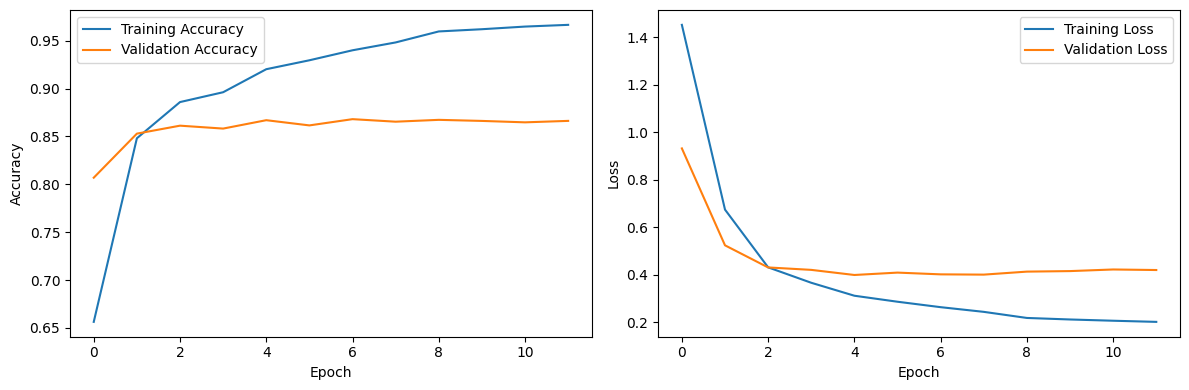

In [15]:
#---------------- Do not change the code below ----------------#
# Run this cell to plot the training history
plot_history(history)